In [1]:
import uproot
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import fsspec
import glob
!pip install scipy


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from scipy.optimize import curve_fit
from scipy.stats import norm
!pip install vector
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
file_urls = ['root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/003FDED0-EDD0-E211-8DF3-1CC1DE0437C8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/006BE1A5-FDD0-E211-983E-00266CFFCAC0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/021F47B9-3CD1-E211-AAD6-00266CFFC598.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/04C27A0D-0BD1-E211-8DF2-00266CF82C98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/0672B0BF-D5D0-E211-A682-00266CFF0034.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/06F68A4F-0FD1-E211-81B9-00266CFFBF84.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/0814B43D-E1D1-E211-B312-00266CFFBF34.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/0827DEB7-EED0-E211-AB1A-00266CFFC13C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/08307F22-34D1-E211-8169-00266CFFCB80.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/0ABF9828-D4D0-E211-B746-00266CFFC7E4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/0CAFBC4A-E1D1-E211-94F1-00266CFFBE88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/0E57DE74-E1D1-E211-B745-00266CFFC43C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/124DA314-06D1-E211-826D-AC162DABBBA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/14259B71-F0D0-E211-B387-00266CFFCD00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/147AEA32-EAD0-E211-9B74-1CC1DE04FF98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/1A227543-E1D1-E211-A854-00266CF82C98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/1AA061D7-05D2-E211-8BC4-008CFA0527CC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/1CABE375-EDD0-E211-A08E-78E7D1E4B6E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/209F4CE6-DAD0-E211-BDF3-00266CF89498.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/2427E04F-01D1-E211-827A-1CC1DE051028.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/2494B30A-F2D0-E211-A316-00266CFFBF90.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/2647E4AA-F8D0-E211-8601-1CC1DE051060.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/2A21B55C-FCD0-E211-810A-1CC1DE052048.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/2A9D6382-1FD1-E211-BD41-00266CF89498.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/2AF0D0DA-F2D0-E211-B3BB-78E7D164DF08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/2E94EA0C-09D1-E211-878A-00266CFFCC7C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/36B1911B-0FD2-E211-8EBC-1CC1DE1D2028.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/3A74F066-D1D0-E211-8612-00266CFEFE08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/3AA967B8-E2D0-E211-B4CD-00266CFFBDAC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/3C9A18E9-3FD1-E211-883D-1CC1DE1D2004.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/3CCE1C33-CDD0-E211-8214-00266CFEFE08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/3CE64648-E9D0-E211-9321-1CC1DE051118.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/3E1B6E59-F7D0-E211-A57B-78E7D1E4B772.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/3E59C691-05D1-E211-B247-1CC1DE1CE128.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/407B9D17-D5D0-E211-9B77-00266CFFBF34.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/40AB1839-FED0-E211-BE45-00266CFFCAC0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/448FB967-F1D0-E211-A7A1-00266CFFCD00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/462C4C82-FFD0-E211-B264-1CC1DE1D14A0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/46989867-07D1-E211-9DBF-00266CFFCA1C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/481478F8-D2D0-E211-9F0A-AC162DABAF78.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/48445042-17D1-E211-9938-00266CFFCB14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/48E9F017-E8D0-E211-8356-AC162DACC3F8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/5042C653-EED0-E211-AAFC-1CC1DE05B0C8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/522153A7-FAD0-E211-A18D-00266CFFCCB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/526168F9-11D1-E211-9142-1CC1DE1CF1F6.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/52B290E7-E0D1-E211-BBBA-AC162DACC3F0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/549C1440-E1D1-E211-8420-00266CFE79A4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/54BF7BBB-F5D0-E211-B868-78E7D164DF08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/5A8E62CC-19D1-E211-B336-00266CFFCCC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/5ABD136F-37D1-E211-B6D8-00266CFF0034.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/5C27DB7C-E1D1-E211-87C9-00266CFFCB14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/5CB4C1F1-D6D0-E211-920D-00266CFFCAA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/5CF580F7-F3D0-E211-986A-00266CFFBF34.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/5EAD1037-00D2-E211-8CD2-1CC1DE040FA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/602509B0-E3D0-E211-989B-008CFA0518D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/605DB34C-DDD0-E211-9CDD-00266CFFC76C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/60679EEA-21D1-E211-8B4C-1CC1DE1D036C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/628BAF2D-02D1-E211-9FE0-78E7D1E49B52.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/647F996D-0AD1-E211-AAF2-00266CFFC13C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/68C9E05D-FCD1-E211-9CE7-00266CFFC0C0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/6CEC4EB1-00D1-E211-8D17-1CC1DE1D16D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/6EA4E993-1ED1-E211-AF89-1CC1DE1CF1BA.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/70851BEF-E0D0-E211-9D5A-00266CFFC76C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/70E2C24E-D2D0-E211-9BAA-1CC1DE1CDCAE.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/7240AE5F-F3D0-E211-9378-78E7D164DF08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/72F68281-E1D1-E211-AC47-00266CFFBF80.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/78C57C12-E7D0-E211-8D09-AC162DA8E1E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/78DCCA39-E1D1-E211-BBBA-00266CFFC664.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/7A39C63E-E1D1-E211-8D09-00266CFFCCBC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/7C22070C-CBD0-E211-8D64-00266CFFBF50.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/7CD934C9-05D1-E211-9821-00266CFFC598.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/7E5D6246-0CD1-E211-8B61-00266CFF090C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/7E8371D1-FFD1-E211-89FA-00266CFFBC64.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/7EB998C0-DCD0-E211-8A29-00266CFFBC64.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/80A507CF-20D1-E211-B0DB-AC162DACC328.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/8238447A-E5D0-E211-B78A-1CC1DE1CE56C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/82A8572D-E6D0-E211-BA81-00266CFFC0C0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/82D7C990-D7D0-E211-8938-00266CFFCAA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/843C56F3-EAD0-E211-A84E-1CC1DE0437C8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/885054A7-01D2-E211-8AD3-00266CFFC89C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/888B9487-06D1-E211-88BE-AC162DABBBA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/8A23E79B-ECD0-E211-8D27-1CC1DE1CE170.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/8A7C6155-FBD0-E211-832F-008CFA052A88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/8AB770CF-09D1-E211-AD00-00266CFF0A88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/8AC07632-CFD0-E211-936F-00266CFE8A04.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/8C591205-DAD0-E211-8468-00266CFFBEB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/8CE13671-3ED1-E211-91F3-1CC1DE046F00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/9046EBE0-DED0-E211-A0AF-78E7D1E49636.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/926C63D9-CDD0-E211-AB3A-78E7D1E4B6E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/941E966E-FBD1-E211-8F31-00266CFEFCE8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/96396EA1-F2D0-E211-A22B-1CC1DE1D023A.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/9642EF4C-0DD1-E211-8C28-00266CFE7ADC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/9673244F-04D1-E211-839A-00266CFEFDC4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/9887BD18-FED1-E211-A6D0-00266CFFBDE8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/98FEC050-DED0-E211-9F9E-00266CFFBF84.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/9AC15284-02D2-E211-A316-008CFA05206C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/9C0C31B5-E8D0-E211-B0AC-1CC1DE051118.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/9CB6CE3F-1BD1-E211-8C1A-00266CFEFC38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/9E90409B-CCD0-E211-A617-00266CFFBF38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/A064913E-E4D0-E211-B399-AC162DA87230.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/A259C19B-C9D0-E211-A38F-1CC1DE04FF98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/A2A558F2-E4D0-E211-BC89-00266CFF0AF4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/A6384E5B-E0D0-E211-ADE6-1CC1DE1CEFE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/A8B60D4C-ECD0-E211-9C90-008CFA0518D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/ACD5FA3B-04D2-E211-BD1D-00266CFFBEB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/AE2116FD-EED0-E211-B55D-00266CFFBDB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/B2187786-F5D0-E211-855B-00266CFF0ACC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/B24DD091-D4D0-E211-BCD1-1CC1DE1CE128.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/B4017831-09D1-E211-9A5D-1CC1DE1D2028.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/B6948FAC-03D2-E211-886E-00266CFF0138.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/B8B855F6-23D1-E211-B933-00266CFFBE54.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/BE33C9DC-1BD1-E211-BEB4-00266CF91A18.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/C4335831-E7D0-E211-B097-1CC1DE055158.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/C6390842-E1D1-E211-8340-008CFA052A88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/C80751DA-EFD0-E211-91F2-1CC1DE0437C8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/CE3E3356-0ED1-E211-8258-00266CFFBF94.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/CE7E101E-D9D0-E211-8952-00266CFFBCE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/CEE1EB48-10D1-E211-AA64-1CC1DE051118.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/D0186C11-FDD0-E211-A7A0-00266CFE8A04.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/D08937B4-EBD0-E211-B656-1CC1DE0437C8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/D26B3868-DFD0-E211-93B3-1CC1DE04DF70.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/D42309D2-F9D0-E211-8AF0-00266CFFCCB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/D6266526-03D1-E211-AD0D-00266CFFC7B0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/D8465999-15D1-E211-A7A3-1CC1DE1CE128.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/DABB608B-27D1-E211-9D50-00266CFFCD50.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/DCFD5080-03D1-E211-A093-1CC1DE050110.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/DEF338A2-0BD1-E211-BC6C-00266CFFBF38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E076D3B0-E2D0-E211-888C-1CC1DE1D16D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E0B5B893-EFD0-E211-B5CE-00266CFFCD00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E22457A1-04D1-E211-B66E-1CC1DE04DF70.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E22ED692-D0D0-E211-8A6F-1CC1DE1D1E3C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E2437C09-FED0-E211-B669-00266CFFCCC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E2E82121-00D1-E211-B246-1CC1DE0510A8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E61CCB03-19D1-E211-A8EE-1CC1DE051060.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E6584B8D-F6D0-E211-A2A6-78E7D1E4B772.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E6B93141-E1D1-E211-95F2-00266CFE8A04.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/E8A77388-E1D0-E211-BA93-00266CFFCB7C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/EA5D0DBC-F7D0-E211-A46E-1CC1DE04FF48.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/EA75D68D-07D2-E211-B7C4-00266CFEFE1C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/EAB33F51-39D1-E211-9D1F-008CFA0527CC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F2CE4E05-08D1-E211-8D0C-008CFA0527CC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F45D2CE0-13D1-E211-B974-1CC1DE046F78.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F4A4497D-3AD1-E211-90B9-00266CFFC4C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F600693A-E1D1-E211-9676-00266CFFCCC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F60ADACF-DBD0-E211-93AB-AC162DA8C2B0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F65B99CE-F4D0-E211-8EFD-78E7D164DF08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F66B73E0-FCD1-E211-B817-00266CFF0034.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F6EF8015-14D1-E211-B719-1CC1DE052048.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/F84065BB-1DD1-E211-AF0B-1CC1DE0510A8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/FA15CF66-FED1-E211-B064-00266CFFCCC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v1/20000/FE8B15D2-F1D0-E211-9F4B-1CC1DE056080.root']



In [4]:
needed_branches = [  
    "recoMuons_muons__RECO.obj.pt_",
    "recoMuons_muons__RECO.obj.eta_",
    "recoMuons_muons__RECO.obj.phi_",
    "recoMuons_muons__RECO.obj.mass_"
]

four_momentum = uproot.concatenate({file_url: "Events" for file_url in file_urls}, needed_branches)

In [5]:
muon_pt = four_momentum["recoMuons_muons__RECO.obj.pt_"]
muon_eta = four_momentum["recoMuons_muons__RECO.obj.eta_"]
muon_phi = four_momentum["recoMuons_muons__RECO.obj.phi_"]
muon_mass = four_momentum["recoMuons_muons__RECO.obj.mass_"]

valid_events = ak.num(muon_pt) >= 4
muon_pt = muon_pt[valid_events]
muon_eta = muon_eta[valid_events]
muon_phi = muon_phi[valid_events]
muon_mass = muon_mass[valid_events]

def compute_p4(pt, eta, phi, mass):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    energy = np.sqrt(px**2 + py**2 + pz**2 + mass**2)
    return ak.zip({"px": px, "py": py, "pz": pz, "E": energy})

muon_p4 = compute_p4(muon_pt, muon_eta, muon_phi, muon_mass)

def invariant_mass(p4):
    E = ak.sum(p4["E"], axis=-1)
    px = ak.sum(p4["px"], axis=-1)
    py = ak.sum(p4["py"], axis=-1)
    pz = ak.sum(p4["pz"], axis=-1)
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))

zz_mass = invariant_mass(muon_p4)

print(len(zz_mass))

831747


In [8]:
file_urls_1 = ['root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/029D759D-6CD9-E211-B3E2-1CC1DE041FD8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/02A8CA7F-52D9-E211-9260-1CC1DE1D1F80.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/0824586C-4CD9-E211-87B3-1CC1DE041FD8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/22FD6176-5ED9-E211-818D-AC162DACE1B8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/24DB66A2-4DD9-E211-BAE1-00266CFEFC38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/281F76A2-23D9-E211-BB68-1CC1DE04FF50.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/28CDF98C-43D9-E211-ADB8-00266CFFCAC0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/32C0B5E3-5BD9-E211-B275-1CC1DE1CDF2A.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/387184FD-4DD9-E211-A8CC-00266CFFBF64.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/3C72440D-60D9-E211-87B8-008CFA052A88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/421ABD63-51D9-E211-81B4-AC162DA87230.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/42D7D08F-45D9-E211-9754-00266CFFCD60.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/5623F7A5-67D9-E211-83A2-1CC1DE05B0C8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/5E1BF8AC-64D9-E211-87D9-008CFA0527CC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/640458BB-48D9-E211-8684-78E7D1E49636.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/72F33A13-66D9-E211-A928-00266CFEFDEC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/7C717FB0-38D9-E211-9D3B-00266CFFC9EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/86AF48A1-68D9-E211-9E4C-00266CFFBED8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/8C00288B-57D9-E211-AA17-D485645C8BC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/942A698C-47D9-E211-8E87-1CC1DE052068.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/9689388B-4FD9-E211-91ED-1CC1DE04FF48.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/9A28FC69-50D9-E211-94D5-00266CFFCB14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/9A5F5551-51D9-E211-99B2-00266CFFC51C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/AC79DD3E-55D9-E211-95D5-1CC1DE1D14A0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/BE525F74-53D9-E211-AB10-00266CFE6404.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/C4956C23-67D9-E211-BE12-AC162DA87230.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/CA308B89-4BD9-E211-9175-AC162DACC3E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/CABC0B0A-73D9-E211-B2C9-00266CFFC940.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/DC9542DD-55D9-E211-898A-00266CFFCD6C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/DCA5DF96-4ED9-E211-8AED-1CC1DE046F78.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/EAF03D95-75D9-E211-84D6-1CC1DE04FF98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/EE8E8C06-73D9-E211-8FF9-1CC1DE046FC0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/F01FC321-61D9-E211-8A71-00266CFFCD6C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/SMHiggsToZZTo4L_M-125_8TeV-powheg15-JHUgenV3-pythia6/AODSIM/PU_S10_START53_V19-v1/10000/F8333E82-64D9-E211-8DF3-00266CFEFDEC.root']

In [9]:
needed_branches_1 = [  
    "recoMuons_muons__RECO.obj.pt_",
    "recoMuons_muons__RECO.obj.eta_",
    "recoMuons_muons__RECO.obj.phi_",
    "recoMuons_muons__RECO.obj.mass_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.pt_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.eta_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.phi_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.mass_"
]

four_momentum_1 = uproot.concatenate({file_url: "Events" for file_url in file_urls_1}, needed_branches_1)

In [10]:
muon_pt_1 = four_momentum_1["recoMuons_muons__RECO.obj.pt_"]
muon_eta_1 = four_momentum_1["recoMuons_muons__RECO.obj.eta_"]
muon_phi_1 = four_momentum_1["recoMuons_muons__RECO.obj.phi_"]
muon_mass_1 = four_momentum_1["recoMuons_muons__RECO.obj.mass_"]
print(len(muon_pt_1))

valid_events_1 = ak.num(muon_pt_1) >= 4
muon_pt_1 = muon_pt_1[valid_events_1]
muon_eta_1 = muon_eta_1[valid_events_1]
muon_phi_1 = muon_phi_1[valid_events_1]
muon_mass_1 = muon_mass_1[valid_events_1]

muon_p4_1 = compute_p4(muon_pt_1, muon_eta_1, muon_phi_1, muon_mass_1)

four_mu_mass = invariant_mass(muon_p4_1)
print(len(muon_pt_1))

299973
85448


Fitted Higgs Mass: 125.75 ± 0.60 GeV
Fitted Higgs Width: 4.06 ± 0.60 GeV


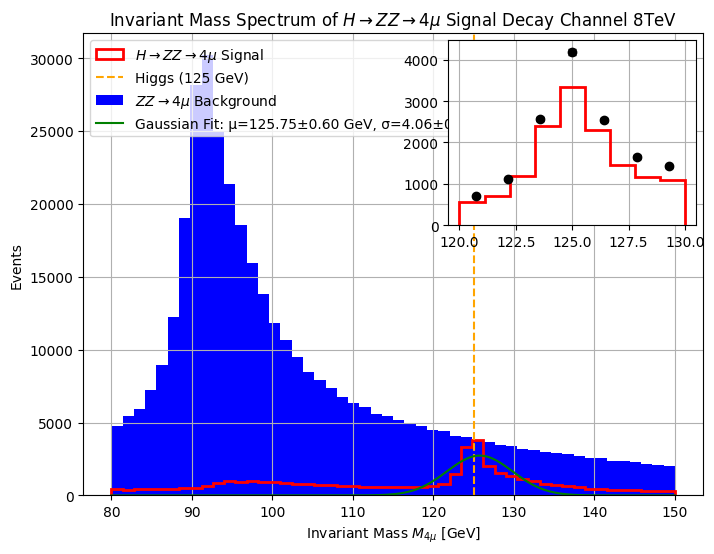

In [31]:
fig, ax = plt.subplots(figsize=(8,6)) 
ax.hist(four_mu_mass, bins=50, range=(80, 150), histtype="step", linewidth=2, color="red", label=r"$H \to ZZ \to 4\mu$ Signal")
#ax.axvline(91.2, color='blue', linestyle="dashed", label=r"$Z \to 4\mu$ Background (91 GeV)")
ax.axvline(125, linestyle="dashed", label="Higgs (125 GeV)", color='orange')

ax.hist(zz_mass, bins=50, range=(80, 150), linewidth=2, color="blue", label=r"$ZZ \to 4\mu$ Background")

def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

bins = np.linspace(80, 150, 50)  
hist_values, bin_edges = np.histogram(four_mu_mass, bins=bins)
errors = np.sqrt(hist_values)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

valid_mask = (hist_values > 0) & (~np.isnan(hist_values))
bin_centers = bin_centers[valid_mask]
hist_values = hist_values[valid_mask]
errors = errors[valid_mask]

bin_centers = np.array(bin_centers, dtype=float)
hist_values = np.array(hist_values, dtype=float)
errors = np.array(errors, dtype=float)

initial_guess = [max(hist_values), 125, 2] 

popt, pcov = curve_fit(gaussian, bin_centers, hist_values, p0=initial_guess)

A_fit, mu_fit, sigma_fit = popt
sigma_err = np.sqrt(pcov[2,2])  # Error in sigma
mu_err = np.sqrt(pcov[1,1])  # Error in mu

x_fit = np.linspace(80, 150, 500)
ax.plot(x_fit, gaussian(x_fit, *popt), 'g-', label=f'Gaussian Fit: μ={mu_fit:.2f}±{mu_err:.2f} GeV, σ={sigma_fit:.2f}±{sigma_err:.2f} GeV')
ax.set_xlabel(r"Invariant Mass $M_{4\mu}$ [GeV]")
ax.set_ylabel("Events")
ax.legend(loc="upper left")
ax.grid(True)
ax.set_title(r"Invariant Mass Spectrum of $H \to ZZ \to 4\mu$ Signal Decay Channel 8TeV")

axins = inset_axes(ax, width="40%", height="40%", loc="upper right")  # Position the zoomed-in plot
axins.grid(True)

zoom_range = (120, 130)
zoom_mask = (bin_centers > zoom_range[0]) & (bin_centers < zoom_range[1])
zoom_bins = np.linspace(120, 130, 10)

axins.errorbar(bin_centers[zoom_mask], hist_values[zoom_mask], yerr=errors[zoom_mask], fmt='o', color='black', capsize=3)
axins.hist(four_mu_mass, bins=zoom_bins, histtype="step", linewidth=2, color="red", label=r"$H \to ZZ \to 4\mu$ Signal")

print(f"Fitted Higgs Mass: {mu_fit:.2f} ± {mu_err:.2f} GeV")
print(f"Fitted Higgs Width: {sigma_fit:.2f} ± {sigma_err:.2f} GeV")
plt.savefig('4')

In [13]:
file_urls_e = ['root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/022A8CC0-3ED2-E211-B800-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/04411763-2FD2-E211-A977-00266CFFCAC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/04AF0035-33D2-E211-A2B2-00266CFFC13C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/06534444-3AD2-E211-A605-00266CFFBF94.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/081393FA-22D2-E211-A87D-008CFA05206C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/082EB932-36D2-E211-A291-00266CFF0034.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/08A8A913-2CD2-E211-8225-00266CFFC544.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/08B51F90-22D2-E211-9E82-1CC1DE1CDD20.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/0C7B9442-40D2-E211-8723-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/0EE6F70F-3ED2-E211-8DF7-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/106B0BEE-1FD2-E211-8EAC-00266CFFC7E4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/1241A02F-26D2-E211-94F0-00266CFFCD00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/149AE5B5-40D2-E211-A514-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/16D807ED-3DD2-E211-9FFF-00266CF82C98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/16FD9040-46D2-E211-96E7-00266CFFBF38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/1AB163C9-41D2-E211-9421-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/1AFDE897-1FD2-E211-9CA2-00266CFE7ADC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/225DA2B7-24D2-E211-980F-00266CFFBF84.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/246E1207-2AD2-E211-AD3C-00266CFFC13C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/26889407-27D2-E211-8EAE-00266CFFCD00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/269AD11E-39D2-E211-9BE1-00266CFFBF94.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/26C79F50-43D2-E211-BC57-00266CFFCA1C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/26ECE925-31D2-E211-AC0E-00266CFE8A04.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/28437D25-31D2-E211-A1BB-00266CFE7ADC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/2A455435-41D2-E211-AE9D-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/2EBEC14B-27D2-E211-803F-00266CFFCD50.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/2EDD56CD-23D2-E211-807A-1CC1DE1D03DE.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/30B140ED-39D2-E211-BDD8-00266CFFBF88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/30C1CED8-28D2-E211-B7F4-00266CFFC13C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/34B9BE17-21D2-E211-B121-008CFA0518D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/3670FE2F-2ED2-E211-8C74-00266CFFC76C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/3680B970-2CD2-E211-82B2-1CC1DE1CDD20.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/3A20461A-2FD2-E211-915F-00266CFFC4C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/3C3F5A29-36D2-E211-8443-00266CFEFCE8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/427939B7-24D2-E211-8A1F-00266CFEFDC4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/4433B603-27D2-E211-A245-00266CFFBCB0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/46128D94-38D2-E211-884B-00266CFFC9C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/46BD8742-2BD2-E211-A8E6-00266CFEFDE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/46CBD784-2BD2-E211-895D-00266CFEFF04.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/480904ED-1FD2-E211-85FB-00266CFFCAC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/480A0C53-3DD2-E211-A20C-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/48E1D619-2FD2-E211-BCBA-00266CFEFDE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/4A8129C5-20D2-E211-860E-00266CFFC7E4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/4C1D565F-2AD2-E211-97CA-00266CFFCB14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/4C48977E-44D2-E211-B09B-1CC1DE04DF70.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/503A0B4D-25D2-E211-B3D7-00266CFFC4D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/508A116B-29D2-E211-9281-00266CFFC13C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/541BDE6D-29D2-E211-90C1-00266CFFC980.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/5424F471-24D2-E211-9F4D-00266CFFCAC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/54627C6E-34D2-E211-865F-008CFA051DA8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/5631E033-2BD2-E211-B7B6-AC162DABBBA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/56F5F247-1DD2-E211-BDE4-00266CFFBF84.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/58CB1169-32D2-E211-8456-00266CFF0ACC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/5ACFFD34-2ED2-E211-A749-1CC1DE051038.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/5AF8F04F-1FD2-E211-BC0B-00266CFFC80C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/5C13E53F-23D2-E211-B82D-00266CFFCC7C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/5ED0CB97-25D2-E211-9C3F-00266CFFBF84.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/62D3149D-2AD2-E211-88CC-00266CFFC76C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/64E9551D-29D2-E211-8772-00266CFFC9EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/681D757D-44D2-E211-B4C4-1CC1DE047F98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/6E897AF5-22D2-E211-A09E-00266CFFC198.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/6ECCDB94-25D2-E211-8B66-00266CFF0840.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/6EEA68A6-45D2-E211-BC97-00266CFFBF38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/70314299-3AD2-E211-8671-00266CFFBF88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7220FCD2-23D2-E211-B92A-008CFA052C0C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/729E1B44-42D2-E211-B218-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7AB39FF2-1FD2-E211-9EA5-00266CFFC80C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7AEF6E4B-25D2-E211-92AB-00266CFFC4D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7E04FA3E-3DD2-E211-BDA2-00266CF82C98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7E33B198-25D2-E211-8781-1CC1DE0500F0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7E615765-34D2-E211-B305-1CC1DE1CF1F6.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7E817BE2-36D2-E211-A640-00266CFFBCFC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7EE3B533-26D2-E211-8181-AC162DA87230.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/7EEC1F67-2AD2-E211-84E4-AC162DAC3428.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/888A76D8-23D2-E211-A04A-00266CFEFDC4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/88C3E2F3-35D2-E211-AB63-00266CFFCD50.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/8A244534-26D2-E211-A5DE-00266CFFBDAC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/8A456F72-24D2-E211-95BA-00266CFFBCDC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/8ACD2773-2ED2-E211-AA3A-1CC1DE1D2028.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/8E0A17B8-31D2-E211-9FD5-00266CFE7ADC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/8E5EA8C3-36D2-E211-B148-00266CFFC9EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/8E6F81B9-24D2-E211-A174-00266CFFC7CC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/8EA94A02-1FD2-E211-BE5D-00266CFFCD00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/901BB7BB-2FD2-E211-B4A1-00266CFFCB14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/90AF74AE-2CD2-E211-9B77-AC162DABBBA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/92EB03EC-35D2-E211-957D-00266CFFC9EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/9EB103EC-27D2-E211-936C-00266CFFC43C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/A08F2F0A-35D2-E211-A7C1-00266CFFC76C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/A239E7A5-21D2-E211-8F4A-00266CFFBCFC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/A447FD19-1ED2-E211-9CF4-00266CFFBF64.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/A4F5AFEB-27D2-E211-9C36-00266CFEFDC4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/A4FE3C92-22D2-E211-ADAD-1CC1DE1D036C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/A670D83C-22D2-E211-B109-1CC1DE1CDD20.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/A8B3493F-23D2-E211-A50D-00266CFFCB80.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/AAD73FB5-2CD2-E211-ADB0-1CC1DE047F98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/AE3D1355-27D2-E211-94B8-78E7D1E49636.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/AEF865C4-36D2-E211-828D-00266CFFCD50.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/B09D15BB-39D2-E211-AF37-00266CFFBF90.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/B230B840-22D2-E211-A8CD-00266CFFC948.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/B4B5351E-2CD2-E211-ADC9-1CC1DE047F98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/B4C16DC1-3FD2-E211-9C15-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/B675144D-25D2-E211-A39F-00266CFFCC50.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/B6FF7C38-33D2-E211-9463-00266CFEFC5C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/BCC2A508-30D2-E211-BCB9-00266CFFBC3C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/C22610A1-27D2-E211-ADA7-00266CFF0034.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/C4231268-1ED2-E211-8154-00266CFFC4C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/C8A12966-2CD2-E211-96F3-1CC1DE047FD8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/C8DC20A0-38D2-E211-A850-00266CFFC044.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/CA036F44-22D2-E211-A509-00266CFFCAA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/CABD720F-21D2-E211-B9AD-1CC1DE051080.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/CAE406A1-38D2-E211-8B16-00266CFFCCB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/CE881A1B-1CD2-E211-86BE-008CFA051DA8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/D2C370E8-27D2-E211-AC1A-00266CFFC13C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/D41F0D8B-2BD2-E211-97F8-00266CFFC0C0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/D49A4CB4-42D2-E211-AD6D-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/D8F8DE4F-3FD2-E211-A75C-00266CF82C98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/DA1C66A1-45D2-E211-96D3-00266CFFCD00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/DE0986E5-3BD2-E211-9EC4-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/DE2598EA-3AD2-E211-BA4F-1CC1DE047FD8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/DE85EB7B-28D2-E211-A0F1-00266CFFC9EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/E0A11D20-39D2-E211-A384-00266CFFBF88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/E0EA09BA-3CD2-E211-9B27-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/E2015043-40D2-E211-94FA-00266CF82C98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/E25E3AB6-3FD2-E211-A1E4-00266CF82C98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/E86730B7-3ED2-E211-B27A-00266CF82C98.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/EA090420-2CD2-E211-B7E8-1CC1DE04FF48.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/EC6C920D-32D2-E211-8D85-00266CFEFC38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/EC71EC4B-3FD2-E211-8DBF-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/ECE70562-21D2-E211-A0D1-1CC1DE1D14A0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/EE13154D-30D2-E211-837C-00266CFE8A04.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/EE77F9FC-37D2-E211-8CDB-00266CFFC9C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/EE97409D-3AD2-E211-A962-00266CFFCB14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/EEE632EC-22D2-E211-BA79-1CC1DE04DF70.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/F00145DA-28D2-E211-AF5B-008CFA052A88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/F01CCB00-20D2-E211-85E2-00266CFFC848.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/F2090013-21D2-E211-B1B8-00266CFEFF04.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/F87340A3-21D2-E211-87F2-00266CFEFF04.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/F8E72C71-2FD2-E211-9908-00266CFFCD14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/FA689E12-35D2-E211-999D-00266CFFBEB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/FA9633DE-23D2-E211-9499-00266CFFBF84.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/FABA69F0-2FD2-E211-95AD-00266CFFCAC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/FC672249-2ED2-E211-9982-00266CFFBDB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo4e_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/20000/FCF58002-29D2-E211-AEF9-AC162DABBBA0.root']

In [14]:
needed_branches_e = [  
    "recoGsfElectrons_gsfElectrons__RECO.obj.pt_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.eta_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.phi_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.mass_"
]

four_momentum_e = uproot.concatenate({file_url: "Events" for file_url in file_urls_e}, needed_branches_e)

In [15]:
e_pt_1 = four_momentum_1["recoGsfElectrons_gsfElectrons__RECO.obj.pt_"]
e_eta_1 = four_momentum_1["recoGsfElectrons_gsfElectrons__RECO.obj.eta_"]
e_phi_1 = four_momentum_1["recoGsfElectrons_gsfElectrons__RECO.obj.phi_"]
e_mass_1 = four_momentum_1["recoGsfElectrons_gsfElectrons__RECO.obj.mass_"]
print(len(e_pt_1))

valid_events_2 = ak.num(e_pt_1) >= 4
e_pt_1 = e_pt_1[valid_events_2]
e_eta_1 = e_eta_1[valid_events_2]
e_phi_1 = e_phi_1[valid_events_2]
e_mass_1 = e_mass_1[valid_events_2]

e_p4_1 = compute_p4(e_pt_1, e_eta_1, e_phi_1, e_mass_1)

four_e_mass_1 = invariant_mass(e_p4_1)
print(len(e_p4_1))

299973
30952


In [16]:
e_pt = four_momentum_e["recoGsfElectrons_gsfElectrons__RECO.obj.pt_"]
e_eta = four_momentum_e["recoGsfElectrons_gsfElectrons__RECO.obj.eta_"]
e_phi = four_momentum_e["recoGsfElectrons_gsfElectrons__RECO.obj.phi_"]
e_mass = four_momentum_e["recoGsfElectrons_gsfElectrons__RECO.obj.mass_"]
print(len(e_pt))

valid_events_e = ak.num(e_pt) >= 4
e_pt = e_pt[valid_events_e]
e_eta = e_eta[valid_events_e]
e_phi = e_phi[valid_events_e]
e_mass = e_mass[valid_events_e]

e_p4 = compute_p4(e_pt, e_eta, e_phi, e_mass)

four_e_mass = invariant_mass(e_p4)

print(len(e_pt))

1499093
341058


Fitted Higgs Mass: 125.29 ± 0.278 GeV
Fitted Higgs Width: 4.35 ± 0.278 GeV


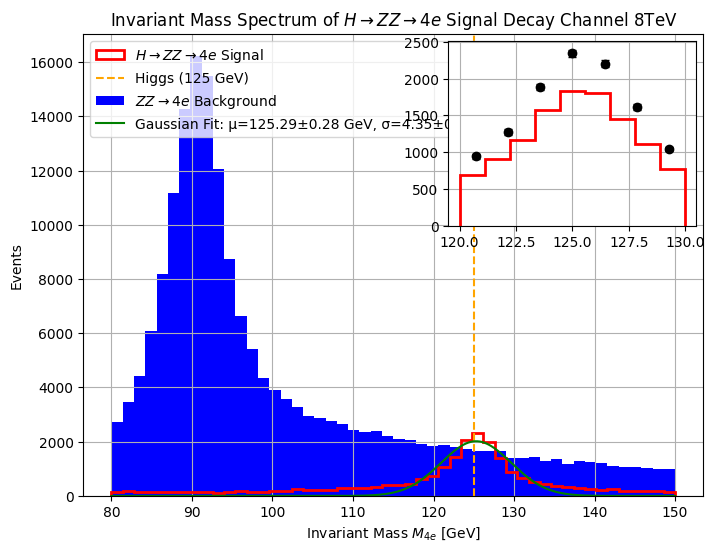

In [28]:
fig, ax = plt.subplots(figsize=(8,6)) 
ax.hist(four_e_mass_1, bins=50, range=(80, 150), histtype="step", linewidth=2, color="red", label=r"$H \to ZZ \to 4e$ Signal")
#ax.axvline(91.2, color='blue', linestyle="dashed", label=r"$Z \to 4\mu$ Background (91 GeV)")
ax.axvline(125, linestyle="dashed", label="Higgs (125 GeV)", color='orange')

ax.hist(four_e_mass, bins=50, range=(80, 150), linewidth=2, color="blue", label=r"$ZZ \to 4e$ Background")

def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

bins = np.linspace(80, 150, 50)  # Same binning as the histogram
hist_values, bin_edges = np.histogram(four_e_mass_1, bins=bins)
errors = np.sqrt(hist_values)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

valid_mask = (hist_values > 0) & (~np.isnan(hist_values))
bin_centers = bin_centers[valid_mask]
hist_values = hist_values[valid_mask]
errors = errors[valid_mask]

bin_centers = np.array(bin_centers, dtype=float)
hist_values = np.array(hist_values, dtype=float)
errors = np.array(errors, dtype=float)

initial_guess = [max(hist_values), 125, 2]  

popt, pcov = curve_fit(gaussian, bin_centers, hist_values, p0=initial_guess)

A_fit, mu_fit, sigma_fit = popt
sigma_err = np.sqrt(pcov[2,2])  # Error in sigma
mu_err = np.sqrt(pcov[1,1])  # Error in mu

x_fit = np.linspace(80, 150, 500)
ax.plot(x_fit, gaussian(x_fit, *popt), 'g-', label=f'Gaussian Fit: μ={mu_fit:.2f}±{mu_err:.2f} GeV, σ={sigma_fit:.2f}±{sigma_err:.2f} GeV')
ax.set_xlabel(r"Invariant Mass $M_{4e}$ [GeV]")
ax.set_ylabel("Events")
ax.legend(loc="upper left")
ax.grid(True)
ax.set_title(r"Invariant Mass Spectrum of $H \to ZZ \to 4e$ Signal Decay Channel 8TeV")

axins = inset_axes(ax, width="40%", height="40%", loc="upper right")  # Position the zoomed-in plot
axins.grid(True)

zoom_range = (120, 130)
zoom_mask = (bin_centers > zoom_range[0]) & (bin_centers < zoom_range[1])
zoom_bins = np.linspace(120, 130, 10)

axins.errorbar(bin_centers[zoom_mask], hist_values[zoom_mask], yerr=errors[zoom_mask], fmt='o', color='black', capsize=3)
axins.hist(four_e_mass_1, bins=zoom_bins, histtype="step", linewidth=2, color="red", label=r"$H \to ZZ \to 4e$ Signal")

print(f"Fitted Higgs Mass: {mu_fit:.2f} ± {mu_err:.3f} GeV")
print(f"Fitted Higgs Width: {sigma_fit:.2f} ± {sigma_err:.3f} GeV")

plt.savefig('5')

In [18]:
muon_pt_2 = four_momentum_1["recoMuons_muons__RECO.obj.pt_"]
muon_eta_2 = four_momentum_1["recoMuons_muons__RECO.obj.eta_"]
muon_phi_2 = four_momentum_1["recoMuons_muons__RECO.obj.phi_"]
muon_mass_2 = four_momentum_1["recoMuons_muons__RECO.obj.mass_"]
e_pt_2 = four_momentum_1["recoGsfElectrons_gsfElectrons__RECO.obj.pt_"]
e_eta_2 = four_momentum_1["recoGsfElectrons_gsfElectrons__RECO.obj.eta_"]
e_phi_2 = four_momentum_1["recoGsfElectrons_gsfElectrons__RECO.obj.phi_"]
e_mass_2 = four_momentum_1["recoGsfElectrons_gsfElectrons__RECO.obj.mass_"]

In [19]:
valid_events_3 = (ak.num(e_pt_2, axis=1) >= 2) & (ak.num(muon_pt_2, axis=1) >= 2)

e_pt_2 = e_pt_2[valid_events_3]
e_eta_2 = e_eta_2[valid_events_3]
e_phi_2 = e_phi_2[valid_events_3]
e_mass_2 = e_mass_2[valid_events_3]

muon_pt_2 = muon_pt_2[valid_events_3]
muon_eta_2 = muon_eta_2[valid_events_3]
muon_phi_2 = muon_phi_2[valid_events_3]
muon_mass_2 = muon_mass_2[valid_events_3]
print(len(e_pt_2))

def four_momentum(pt, eta, phi, mass):
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    E = np.sqrt(px**2 + py**2 + pz**2 + mass**2)
    return px, py, pz, E

px_e, py_e, pz_e, E_e = four_momentum(e_pt_2, e_eta_2, e_phi_2, e_mass_2)
px_mu, py_mu, pz_mu, E_mu = four_momentum(muon_pt_2, muon_eta_2, muon_phi_2, muon_mass_2)

px_2e2mu = ak.sum(px_e, axis=1) + ak.sum(px_mu, axis=1)
py_2e2mu = ak.sum(py_e, axis=1) + ak.sum(py_mu, axis=1)
pz_2e2mu = ak.sum(pz_e, axis=1) + ak.sum(pz_mu, axis=1)
E_2e2mu  = ak.sum(E_e, axis=1) + ak.sum(E_mu, axis=1)

mass_squared = E_2e2mu**2 - (px_2e2mu**2 + py_2e2mu**2 + pz_2e2mu**2)
mass_squared = np.maximum(mass_squared, 0)  # Prevent sqrt of negative numbers
mH_2e2mu = np.sqrt(mass_squared)

mH_2e2mu = ak.to_numpy(mH_2e2mu)

75622


In [26]:
file_urls_emu = ['root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/02A8AB2C-7DD0-E211-9200-00266CFFC7CC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/02B64562-2AD2-E211-BD8F-AC162DACB208.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/082725BB-2AD2-E211-B0B9-00266CFFC4D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/0838017E-2FD2-E211-AF21-00266CFEFC38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/0AD5CBE8-82D2-E211-A1DB-00266CFF0ACC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/0C70ECD0-7DD2-E211-8DEB-00266CFEFE1C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/0CDDE0D8-32D2-E211-886F-00266CFFBCB0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/0EB15CCE-68D2-E211-A5E6-1CC1DE0590E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/14B7F98B-2FD2-E211-B077-1CC1DE051060.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/169CC2DF-80D2-E211-AAD5-00266CFFBFC0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/1A3EB2BA-29D2-E211-8B11-AC162DACB208.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/1E730D73-46D2-E211-887D-1CC1DE1CE128.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/2008356C-1BD2-E211-9E55-00266CFFBF88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/22640368-70D2-E211-9CCB-AC162DA8C2B0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/22B18EB9-6ED2-E211-BCD6-00266CFFCD6C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/24E4C20B-77D2-E211-8F53-00266CFFBE54.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/2AD35FDE-80D2-E211-81D8-AC162DA8C2B0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/2C9097CC-50D2-E211-B808-1CC1DE0590E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/2CD6E94F-62D2-E211-8515-00266CFFBDAC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/2E95DAB3-74D2-E211-8583-1CC1DE04FF48.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/307F1585-45D2-E211-8430-1CC1DE0590E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/32C5404F-69D0-E211-B8C5-00266CFFB7D0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/32C7AB4E-78D2-E211-A01C-00266CFC3B0C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/36716FBE-41D2-E211-A1E2-1CC1DE051038.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/38B70FAC-3ED2-E211-9F26-00266CFFBCFC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/38BF5A92-87D2-E211-83C2-AC162DACC328.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/38CF5B6B-2FD2-E211-B068-00266CFFBCE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/3AAB82A5-59D2-E211-99B1-1CC1DE1CF1F6.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/4216D2A1-63D2-E211-8581-00266CFFBC64.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/421D3577-2ED2-E211-90FD-00266CFFC940.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/447090B6-2AD2-E211-B43F-00266CFF0034.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/46366590-63D2-E211-9FC8-00266CFFC9EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/46FB579E-3ED2-E211-8F29-00266CFFCB80.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/4878B45E-70D2-E211-9442-00266CFFBEB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/48E274B2-74D2-E211-97BE-00266CFFBDE8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/4EA452BE-4AD2-E211-81BF-00266CFF0234.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/4ECA1F1B-5FD2-E211-BF48-00266CFFC4C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/5087355F-23D2-E211-9ABB-1CC1DE1D14A0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/50F6637A-5BD2-E211-A2A5-008CFA0518D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/548CDBF6-7ED0-E211-A2F5-AC162DABAF78.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/569B913B-49D2-E211-A69A-00266CFFC848.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/5A57A412-8BD2-E211-B240-008CFA051EC0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/5AF68C4A-49D2-E211-9D9D-00266CFFCD00.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/5EC2AD21-59D2-E211-A1B8-00266CFFCD14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/600D4B1C-3DD2-E211-8092-00266CF91A18.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/60D344D5-32D2-E211-B9AE-00266CFFBF94.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/60F74B28-50D2-E211-9CE3-00266CFFBF68.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/6295DEB2-74D2-E211-9C9B-AC162DACB208.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/62BCC5CF-22D1-E211-B419-00266CFFBE5C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/62E39967-52D2-E211-82DF-00266CFEFCE8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/62E6DCE7-3CD1-E211-9961-00266CFBE43C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/6413EDAD-77D2-E211-8914-00266CFFBF94.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/6423E0B7-29D2-E211-A21E-00266CFFCD60.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/643B72E6-82D2-E211-8E14-00266CFEFE08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/647ADD83-86D2-E211-ADA7-00266CFFC9EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/64B780C1-4AD2-E211-A60C-00266CFFC848.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/64F5918F-46D2-E211-AF2B-1CC1DE047FD8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/666E3A51-75D2-E211-920E-008CFA051EC0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/667E168D-43D2-E211-874D-00266CFFC948.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/6802364C-3ED2-E211-84F3-1CC1DE1CF1F6.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/680ADDA6-20D2-E211-893F-00266CFF0ACC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/680CF951-43D2-E211-A54C-00266CFBE43C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/680DA338-4DD2-E211-97EC-00266CFEFDC4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/68509E06-5AD2-E211-8998-00266CFFC89C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/6A6D6DCC-55D2-E211-9783-1CC1DE0437C8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/6CC29189-86D2-E211-B397-00266CFFBEB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/74270868-7ED2-E211-91E8-00266CFFCD6C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/76FB3B2F-44D2-E211-B875-00266CFFBC3C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/7880866F-3DD1-E211-85C9-00266CFBE43C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/7E112E11-30D1-E211-8586-78E7D1E4B874.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/7E24B9A7-59D2-E211-BB5D-00266CFFCAA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/826CE0EC-7AD0-E211-8005-00266CFF0608.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/88847E39-4DD2-E211-8D5D-1CC1DE051060.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/8A257F54-43D2-E211-9A93-00266CF65AC4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/8A60AD1E-3DD2-E211-897B-AC162DAC3428.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/8AA82CB0-20D2-E211-880F-AC162DACB208.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/8AABD02A-5ED2-E211-B038-1CC1DE048FB0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/8AEEF14F-34D2-E211-A245-00266CFFC7E0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/8CD42436-51D2-E211-9595-00266CFFBE14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/90A86AFE-6AD2-E211-B1A0-00266CFFC664.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/920D8ABC-7BD2-E211-BDBB-00266CFFBDAC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9231155A-75D2-E211-8071-00266CFFBF34.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/92F222E2-32D2-E211-B123-00266CFEFC38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/94CF109B-3ED2-E211-80C9-008CFA051DA8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9671B4C6-2AD2-E211-9C9B-00266CFBE43C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/96AEE40C-72D2-E211-8EEC-00266CFFBED8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9A5919C0-7BD2-E211-9CC1-00266CFFC198.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9A6A1D2C-50D2-E211-A66C-AC162DAB0B08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9ABBDB51-43D2-E211-85B5-00266CFFCD14.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9CBB2CFE-7AD2-E211-B9A7-AC162DACC3F0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9E0892A7-7ED0-E211-BEFF-00266CFFC980.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9E383CFC-61D2-E211-A4C8-00266CFFCC50.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/9E93FA2D-44D2-E211-B332-00266CFF0034.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/A03EA9B1-5FD2-E211-BBB7-00266CFFCAC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/A0F449C9-87D2-E211-B2D9-00266CFFC198.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/A24588BA-6ED2-E211-BB64-00266CF65AC4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/A2F8D411-72D2-E211-87B5-1CC1DE047FD8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/A4128233-2DD2-E211-988E-1CC1DE1CE01A.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/A62129C1-69D2-E211-B64F-00266CFFC9EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/A6CD7270-83D2-E211-9427-AC162DAB0B08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/A8FACAE4-82D2-E211-8C3F-00266CFFBE88.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/AAF04030-20D1-E211-943C-AC162DABCAF8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/ACE1AD22-59D2-E211-A816-1CC1DE1D036C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/AE74AE56-1DD1-E211-A404-00266CFFCB28.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/B0167B1E-43D2-E211-9071-1CC1DE040FA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/B07F63DD-2DD2-E211-901F-00266CFEFE08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/B6EE9727-78D0-E211-9393-1CC1DE050110.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/B80A43C2-7BD2-E211-AEBD-AC162DACC3F0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/B812B467-2CD1-E211-977E-00266CFBE43C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/BA48836E-40D2-E211-B6E7-00266CFFCAF0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/BA8C6B71-7FD2-E211-BAFA-AC162DABBBA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/BC8471F5-78D2-E211-8934-1CC1DE051080.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/BE4202F5-78D2-E211-A15D-00266CFFB7D0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/BEC15F08-61D2-E211-BC1E-00266CFFCCBC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C0557BE4-2DD2-E211-8486-00266CFFC4E0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C05ADFA4-54D2-E211-8DD6-00266CFFCC7C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C05F306A-7AD2-E211-9D8D-00266CFFBED8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C08FB51B-5FD2-E211-A8C6-1CC1DE041FD8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C23C28AD-47D2-E211-B4DC-00266CFFC848.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C2BD16CB-55D2-E211-AD7D-1CC1DE04FF48.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C4054D31-51D2-E211-B0AC-00266CFFBCB0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C4398E82-8AD2-E211-840A-00266CFEFE70.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C69A0C11-84D2-E211-AA9A-00266CFFCCC8.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/C869E3D2-2ED2-E211-92A6-1CC1DE1D036C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/CAB11754-61D2-E211-BC18-00266CFFC544.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/CC7CA0CD-50D2-E211-AE67-00266CFFBCE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/CCE5137A-40D2-E211-AF32-008CFA05206C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/D22544F3-78D2-E211-B5CE-00266CFFC4E0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/D4B20B78-7FD2-E211-B1BA-00266CFEFC38.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/D62FB611-35D2-E211-8D1A-00266CFFC664.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/D64B1B85-45D2-E211-BC80-1CC1DE1D1E3C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/D6678C11-77D2-E211-AB66-AC162DACB208.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/D8E7379F-84D2-E211-AAE8-00266CFFCD60.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/DA4F0545-3ED2-E211-9C01-00266CFFCD6C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/DA51E629-78D0-E211-842D-AC162DABBBA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/DE71AE5C-34D2-E211-B629-1CC1DE051038.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E00C834F-3ED2-E211-B95A-AC162DAC3428.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E24CC4D2-7DD2-E211-A997-00266CFFC43C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E2DC7C82-8AD2-E211-A586-00266CFF0840.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E449BA13-84D2-E211-B62E-00266CFFBE54.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E4F20970-52D2-E211-B9C6-00266CFFCB7C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E6B4E531-1ED2-E211-9356-00266CFFC544.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E80ED703-72D2-E211-9CDF-1CC1DE0500F0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E821D612-74D2-E211-9D99-008CFA051DEC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/E8EF112A-2CD1-E211-859D-00266CFFBE54.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/EA14442D-51D2-E211-98A3-1CC1DE051060.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/EA6972B4-41D2-E211-900B-00266CFFC4C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/EA788D41-21D2-E211-AE12-00266CFEFE70.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/EAA60A52-4CD2-E211-BFD8-00266CFFBFC0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/ECB99CCF-5ED2-E211-96A5-AC162DACB208.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/EEDD5A26-51D2-E211-A9EA-00266CFFC7CC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/EEFA7225-5ED2-E211-A35B-00266CFF0608.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/F0D50062-70D2-E211-89AD-00266CFF090C.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/F4FAE2DC-80D2-E211-BB0D-1CC1DE051060.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/F605F2E2-2CD2-E211-B49E-00266CFFCCBC.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/F8D5DA5D-6AD2-E211-904D-AC162DABBBA0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/FCBC102E-51D2-E211-9874-00266CFFBF80.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/FE197728-1ED2-E211-BE8D-00266CFFCD60.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/FE6A9AFC-61D2-E211-A578-00266CFEFE08.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/FEB83366-7AD2-E211-B045-00266CFFCAF0.root',
'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/ZZTo2e2mu_8TeV-powheg-pythia6/AODSIM/PU_RD1_START53_V7N-v2/10000/FEE4E990-40D2-E211-BFAA-1CC1DE047F98.root']

In [27]:
needed_branches_emu = [  
    "recoMuons_muons__RECO.obj.pt_",
    "recoMuons_muons__RECO.obj.eta_",
    "recoMuons_muons__RECO.obj.phi_",
    "recoMuons_muons__RECO.obj.mass_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.pt_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.eta_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.phi_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.mass_",
]

four_momentum_emu = uproot.concatenate({file_url: "Events" for file_url in file_urls_emu}, needed_branches_emu)

In [29]:
muon_pt_emu = four_momentum_emu["recoMuons_muons__RECO.obj.pt_"]
muon_eta_emu = four_momentum_emu["recoMuons_muons__RECO.obj.eta_"]
muon_phi_emu = four_momentum_emu["recoMuons_muons__RECO.obj.phi_"]
muon_mass_emu = four_momentum_emu["recoMuons_muons__RECO.obj.mass_"]
e_pt_emu = four_momentum_emu["recoGsfElectrons_gsfElectrons__RECO.obj.pt_"]
e_eta_emu = four_momentum_emu["recoGsfElectrons_gsfElectrons__RECO.obj.eta_"]
e_phi_emu = four_momentum_emu["recoGsfElectrons_gsfElectrons__RECO.obj.phi_"]
e_mass_emu = four_momentum_emu["recoGsfElectrons_gsfElectrons__RECO.obj.mass_"]

valid_events_emu = (ak.num(e_pt_emu) >= 2) & (ak.num(muon_pt_emu) >= 2)

e_pt_emu = e_pt_emu[valid_events_emu]
e_eta_emu = e_eta_emu[valid_events_emu]
e_phi_emu = e_phi_emu[valid_events_emu]
e_mass_emu = e_mass_emu[valid_events_emu]

muon_pt_emu = muon_pt_emu[valid_events_emu]
muon_eta_emu = muon_eta_emu[valid_events_emu]
muon_phi_emu = muon_phi_emu[valid_events_emu]
muon_mass_emu = muon_mass_emu[valid_events_emu]

px_e_emu, py_e_emu, pz_e_emu, E_e_emu = four_momentum(e_pt_emu, e_eta_emu, e_phi_emu, e_mass_emu)
px_mu_emu, py_mu_emu, pz_mu_emu, E_mu_emu = four_momentum(muon_pt_emu, muon_eta_emu, muon_phi_emu, muon_mass_emu)

px_2e2mu_emu = ak.sum(px_e_emu, axis=1) + ak.sum(px_mu_emu, axis=1)
py_2e2mu_emu = ak.sum(py_e_emu, axis=1) + ak.sum(py_mu_emu, axis=1)
pz_2e2mu_emu = ak.sum(pz_e_emu, axis=1) + ak.sum(pz_mu_emu, axis=1)
E_2e2mu_emu  = ak.sum(E_e_emu, axis=1) + ak.sum(E_mu_emu, axis=1)

mass_squared_emu = E_2e2mu_emu**2 - (px_2e2mu_emu**2 + py_2e2mu_emu**2 + pz_2e2mu_emu**2)
mass_squared_emu = np.maximum(mass_squared_emu, 0)  # Prevent sqrt of negative numbers
mZ_2e2mu = np.sqrt(mass_squared_emu)

mZ_2e2mu = ak.to_numpy(mZ_2e2mu)

[[ 4.25293394e+04 -6.90022040e-02 -8.48614481e+01]
 [-6.90022040e-02  5.06059821e-01  4.62765256e-04]
 [-8.48614481e+01  4.62765256e-04  5.07275273e-01]]
Fitted Higgs Mass: 126.744 ± 0.711 GeV
Fitted Higgs Width: 7.930 ± 0.712 GeV


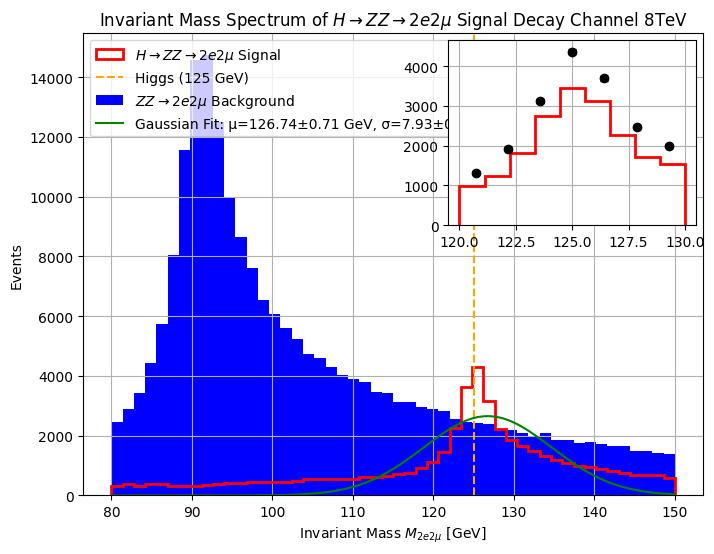

In [30]:
fig, ax = plt.subplots(figsize=(8,6)) 
ax.hist(mH_2e2mu, bins=50, range=(80, 150), histtype="step", linewidth=2, color="red", label=r"$H \to ZZ \to 2e2\mu$ Signal")
#ax.axvline(91.2, color='blue', linestyle="dashed", label=r"$Z \to 4\mu$ Background (91 GeV)")
ax.axvline(125, linestyle="dashed", label="Higgs (125 GeV)", color='orange')

ax.hist(mZ_2e2mu, bins=50, range=(80, 150), linewidth=2, color="blue", label=r"$ZZ \to 2e2\mu$ Background")

bins = np.linspace(80, 150, 50)  # Same binning as the histogram
hist_values, bin_edges = np.histogram(mH_2e2mu, bins=bins)
errors = np.sqrt(hist_values)
# Get bin centers for fitting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

valid_mask = (hist_values > 0) & (~np.isnan(hist_values))
bin_centers = bin_centers[valid_mask]
hist_values = hist_values[valid_mask]
errors = errors[valid_mask]

bin_centers = np.array(bin_centers, dtype=float)
hist_values = np.array(hist_values, dtype=float)
errors = np.array(errors, dtype=float)

initial_guess = [max(hist_values), 125, 2]  # [Amplitude, Mean (Higgs mass ~125 GeV), Width]

popt, pcov = curve_fit(gaussian, bin_centers, hist_values, p0=initial_guess)
print(pcov)

A_fit, mu_fit, sigma_fit = popt
sigma_err = np.sqrt(pcov[2,2])  # Error in sigma
mu_err = np.sqrt(pcov[1,1])  # Error in mu

x_fit = np.linspace(80, 150, 500)
ax.plot(x_fit, gaussian(x_fit, *popt), 'g-', label=f'Gaussian Fit: μ={mu_fit:.2f}±{mu_err:.2f} GeV, σ={sigma_fit:.2f}±{sigma_err:.2f} GeV')
ax.set_xlabel(r"Invariant Mass $M_{2e2\mu}$ [GeV]")
ax.set_ylabel("Events")
ax.legend(loc="upper left")
ax.grid(True)
ax.set_title(r"Invariant Mass Spectrum of $H \to ZZ \to 2e2\mu$ Signal Decay Channel 8TeV")

axins = inset_axes(ax, width="40%", height="40%", loc="upper right")  # Position the zoomed-in plot
axins.grid(True)

zoom_range = (120, 130)
zoom_mask = (bin_centers > zoom_range[0]) & (bin_centers < zoom_range[1])
zoom_bins = np.linspace(120, 130, 10)

axins.errorbar(bin_centers[zoom_mask], hist_values[zoom_mask], yerr=errors[zoom_mask], fmt='o', color='black', capsize=3)
axins.hist(mH_2e2mu, bins=zoom_bins, histtype="step", linewidth=2, color="red", label=r"$H \to ZZ \to 2e2\mu$ Signal")

print(f"Fitted Higgs Mass: {mu_fit:.3f} ± {mu_err:.3f} GeV")
print(f"Fitted Higgs Width: {sigma_fit:.3f} ± {sigma_err:.3f} GeV")
plt.savefig('6')